In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

HAVING THE DATA BUILD AS A SYNTHETIC DATASET BASED ON INFORMATION PROVIDED

In [ ]:
# Sample product data
product_data = pd.DataFrame({
    'Product ID': ['P001', 'P002', 'P003', 'P004'],
    'Category': ['Electronics', 'Clothing', 'Home Goods', 'Groceries'],
    'Price (USD)': [399, 29, 120, 3],
    'Stock Level': [150, 300, 80, 500]
})

# Sample store data
store_data = pd.DataFrame({
    'Store ID': ['S001', 'S002', 'S003', 'S004'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Miami'],
    'Region': ['Northeast', 'West', 'Midwest', 'Southeast'],
    'Store Size (sqft)': [15000, 12000, 13000, 10000]
})

# Sample holiday data
holiday_data = pd.DataFrame({
    'Holiday Name': ['Christmas', 'New Year', 'Independence Day', 'Labor Day'],
    'Date': ['2024-12-25', '2025-01-01', '2024-07-04', '2024-09-02'],
    'Affects Sales': ['Yes', 'Yes', 'Yes', 'No']
})

# Simulating historical sales data for 4 weeks
# Columns: Product ID, Store ID, Week, Sales
sales_data = pd.DataFrame({
    'Product ID': np.random.choice(product_data['Product ID'], 20),
    'Store ID': np.random.choice(store_data['Store ID'], 20),
    'Week': np.random.choice([1, 2, 3, 4], 20),
    'Sales': np.random.randint(1, 50, 20) 
})

# Sample promotional data
promo_data = pd.DataFrame({
    'Product ID': ['P001', 'P002', 'P003', 'P004'],
    'Promotion Type': ['Discount', 'None', 'Bundle', 'None'],
    'Promotion Value': [0.1, 0, 0.2, 0]  
})

# Merge product and store data for cross-join
merged_data = pd.merge(product_data, store_data, how='cross')

# Merge with sales data
merged_data = pd.merge(merged_data, sales_data, on=['Product ID', 'Store ID'], how='left')

# Merge with promotional data
merged_data = pd.merge(merged_data, promo_data, on='Product ID', how='left')

# Merge with holiday data 
merged_data['Holiday Affects Sales'] = merged_data['Region'].map({
    'Northeast': 'Yes',
    'West': 'Yes',
    'Midwest': 'No',
    'Southeast': 'Yes'
})

# Thefinal dataset
data = merged_data
data.head(5)


,Product ID,Category,Price (USD),Stock Level,Store ID,City,Region,Store Size (sqft),Week,Sales,Promotion Type,Promotion Value,Holiday Affects Sales
0,P001,Electronics,399,150,S001,New York,Northeast,15000,NaN,NaN,Discount,0.1,Yes
1,P001,Electronics,399,150,S002,Los Angeles,West,12000,3.0,49.0,Discount,0.1,Yes
2,P001,Electronics,399,150,S003,Chicago,Midwest,13000,1.0,30.0,Discount,0.1,No
3,P001,Electronics,399,150,S004,Miami,Southeast,10000,1.0,13.0,Discount,0.1,Yes
4,P002,Clothing,29,300,S001,New York,Northeast,15000,2.0,12.0,None,0.0,Yes


In [74]:
data.isnull().sum()

Product ID               0
Category                 0
Price (USD)              0
Stock Level              0
Store ID                 0
City                     0
Region                   0
Store Size (sqft)        0
Week                     3
Sales                    3
Promotion Type           0
Promotion Value          0
Holiday Affects Sales    0
dtype: int64

In [75]:
data.fillna(data.mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10604\1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [76]:
data.isnull().sum()

Product ID               0
Category                 0
Price (USD)              0
Stock Level              0
Store ID                 0
City                     0
Region                   0
Store Size (sqft)        0
Week                     0
Sales                    0
Promotion Type           0
Promotion Value          0
Holiday Affects Sales    0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             23 non-null     object 
 1   Category               23 non-null     object 
 2   Price (USD)            23 non-null     int64  
 3   Stock Level            23 non-null     int64  
 4   Store ID               23 non-null     object 
 5   City                   23 non-null     object 
 6   Region                 23 non-null     object 
 7   Store Size (sqft)      23 non-null     int64  
 8   Week                   23 non-null     float64
 9   Sales                  23 non-null     float64
 10  Promotion Type         23 non-null     object 
 11  Promotion Value        23 non-null     float64
 12  Holiday Affects Sales  23 non-null     object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.5+ KB


ENCODE CATEGORICAL VALUES

In [78]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['Promotion Type'] = le.fit_transform(data['Promotion Type'])
data['Holiday Affects Sales'] = le.fit_transform(data['Holiday Affects Sales'])
data['Product ID'] = le.fit_transform(data['Product ID'])
data['Store ID'] = le.fit_transform(data['Store ID'])

In [79]:
data.head()

,Product ID,Category,Price (USD),Stock Level,Store ID,City,Region,Store Size (sqft),Week,Sales,Promotion Type,Promotion Value,Holiday Affects Sales
0,0,1,399,150,0,3,1,15000,2.6,24.5,1,0.1,1
1,0,1,399,150,1,1,3,12000,3.0,49.0,1,0.1,1
2,0,1,399,150,2,0,0,13000,1.0,30.0,1,0.1,0
3,0,1,399,150,3,2,2,10000,1.0,13.0,1,0.1,1
4,1,0,29,300,0,3,1,15000,2.0,12.0,2,0.0,1


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             23 non-null     int32  
 1   Category               23 non-null     int32  
 2   Price (USD)            23 non-null     int64  
 3   Stock Level            23 non-null     int64  
 4   Store ID               23 non-null     int32  
 5   City                   23 non-null     int32  
 6   Region                 23 non-null     int32  
 7   Store Size (sqft)      23 non-null     int64  
 8   Week                   23 non-null     float64
 9   Sales                  23 non-null     float64
 10  Promotion Type         23 non-null     int32  
 11  Promotion Value        23 non-null     float64
 12  Holiday Affects Sales  23 non-null     int32  
dtypes: float64(3), int32(7), int64(3)
memory usage: 1.9 KB


In [81]:
# Feature Engineering (Create new features)
data['Store Size (per unit)'] = data['Store Size (sqft)'] / data['Stock Level']
data['Price per Unit'] = data['Price (USD)'] /data['Stock Level']
data.head()

,Product ID,Category,Price (USD),Stock Level,Store ID,City,Region,Store Size (sqft),Week,Sales,Promotion Type,Promotion Value,Holiday Affects Sales,Store Size (per unit),Price per Unit
0,0,1,399,150,0,3,1,15000,2.6,24.5,1,0.1,1,100.000000,2.660000
1,0,1,399,150,1,1,3,12000,3.0,49.0,1,0.1,1,80.000000,2.660000
2,0,1,399,150,2,0,0,13000,1.0,30.0,1,0.1,0,86.666667,2.660000
3,0,1,399,150,3,2,2,10000,1.0,13.0,1,0.1,1,66.666667,2.660000
4,1,0,29,300,0,3,1,15000,2.0,12.0,2,0.0,1,50.000000,0.096667


A VISUAL REPRESENTATION OD THE TARGET DATA

<Axes: >

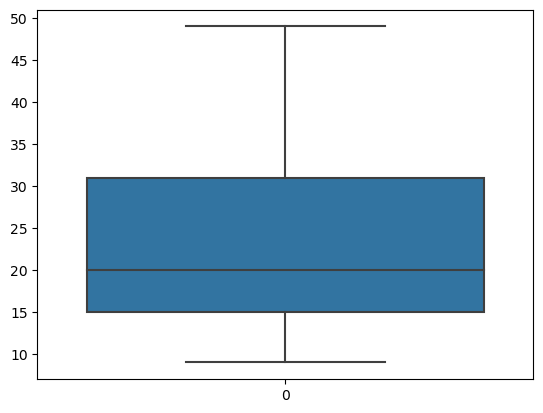

In [83]:
import seaborn as sns
sns.boxplot(data['Sales'])


HANDLING OUTLIERS IN THE TARGET VARIABLE VIA Z_SCORES

In [84]:
# Calculate Z-scores for 'Sales' column
z_scores = stats.zscore(data['Sales'])

# Set threshold for identifying outliers (commonly 3 standard deviations away)
threshold = 3
outliers_zscore = data[abs(z_scores) > threshold]

# Removing outliers (if desired)
data_no_outliers = data[abs(z_scores) <= threshold]


DETERMINE THE FEATURES AND TARGET VARAIBLE

In [85]:
# Selecting relevant features
X = data[['Price (USD)', 'Stock Level', 'Store ID', 'City', 'Region', 'Store Size (sqft)']]
y = data['Sales']


DATA SPLITTING

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SCALING THE FEATURES SO AS TO ENSURE BALANCE 

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL SELECTION

In [88]:
best_params = {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
model = RandomForestRegressor(**best_params)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error is: {mae}")
print(f"Mean Squared Error is: {mse}")
print(f"R2 score is: {r2}")

Mean Absolute Error is: 6.214352014652014
Mean Squared Error is: 129.80926132492965
R2 score is: -0.34573150865570845


XGB MODEL

In [90]:
# Create the XGBoost model
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


XGBoost MAE: 11.798631286621093
XGBoost MSE: 298.3537266078594
XGBoost R2: -2.0930305474586293


LINEAR REGRESSION

In [94]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
# Evaluate performance
print("LR MAE:", mean_absolute_error(y_test, y_pred_lr))
print("LR MSE:", mean_squared_error(y_test, y_pred_lr))
print("LR R2:", r2_score(y_test, y_pred_lr))

LR MAE: 7.241995974050058
LR MSE: 221.18395438597858
LR R2: -1.2930121748494563


GRID SEARCH FOR THR MODEL

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestRegressor()
# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


CHECKING FOR THE FEATURE IMPORTANCE

In [92]:
model = RandomForestRegressor()
# Fitting the model with the training data
model.fit(X_train_scaled, y_train)

# To access feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame to display feature importances
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

             Feature  Importance
0        Price (USD)    0.302643
1        Stock Level    0.274208
4             Region    0.133481
5  Store Size (sqft)    0.131371
2           Store ID    0.092183
3               City    0.066114


CREATING A BARPLOT FOR THE FEATURES IMPORTANCE

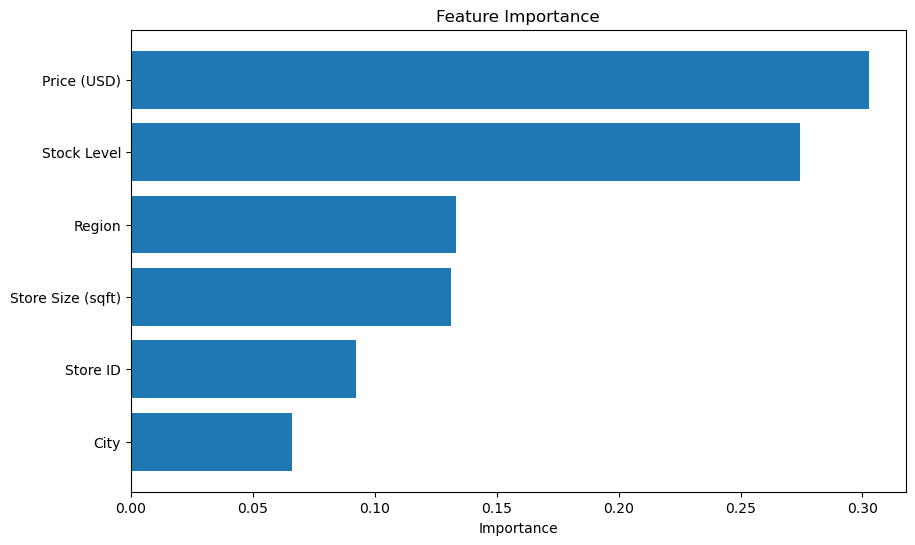

In [ ]:
# To create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()


PLOTTING THE DISTRIBUTION OF SALES

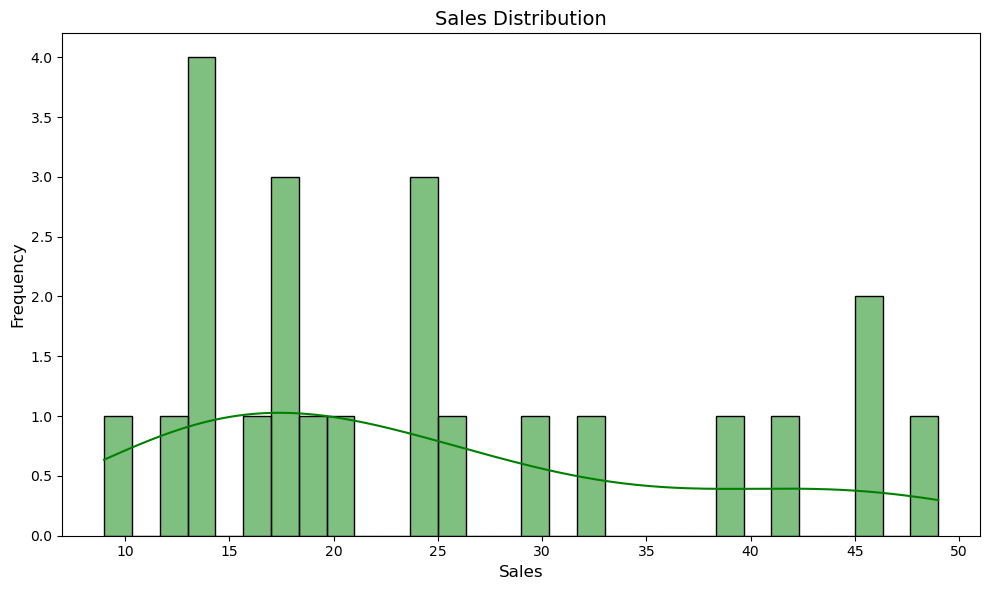

In [97]:
# Plotting the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True, color='green', bins=30)
plt.title('Sales Distribution', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


CORRELATION MATRIX OF THE DATA

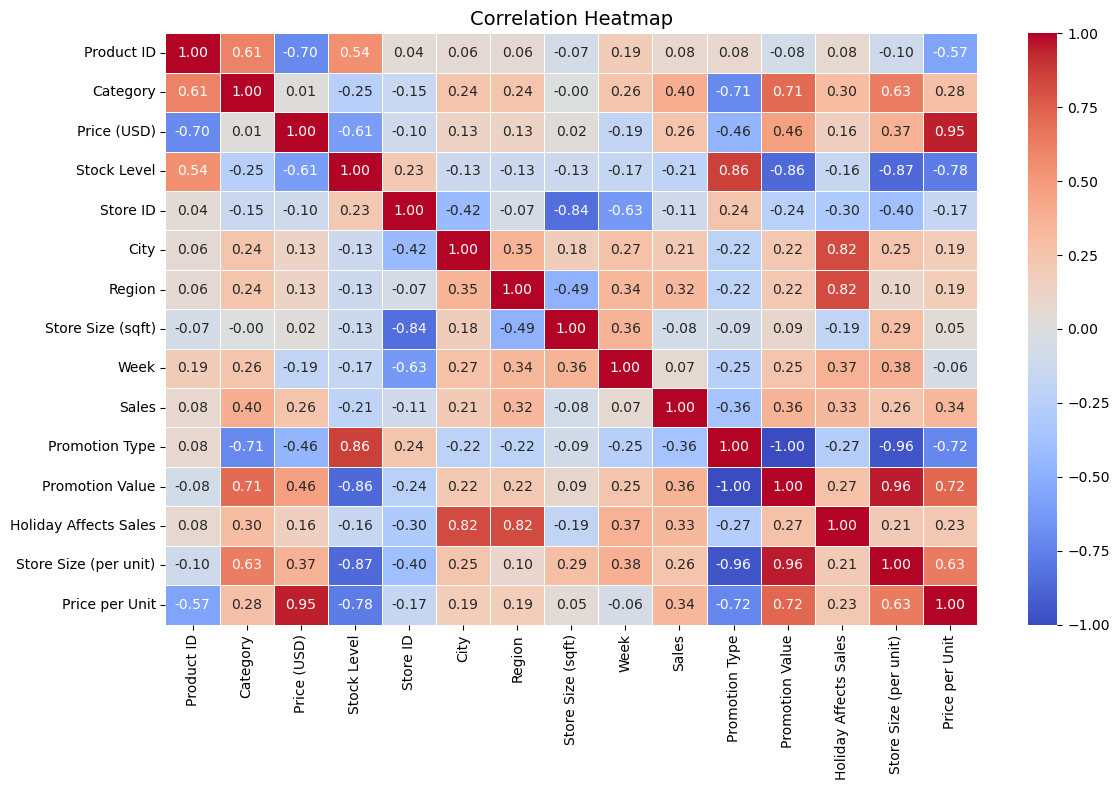

In [ ]:
correlation_matrix = data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

SCATTERED PLOT OF STORE SIZE VS SALES

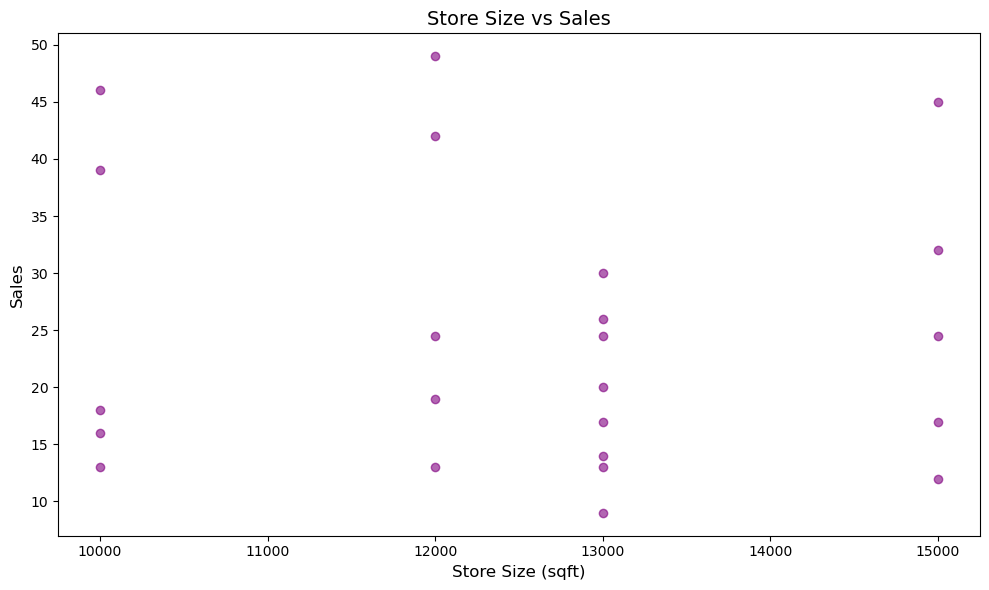

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Store Size (sqft)'], data['Sales'], alpha=0.6, color='purple')
plt.title('Store Size vs Sales', fontsize=14)
plt.xlabel('Store Size (sqft)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.tight_layout()
plt.show()